<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-10 14:26:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.4MB/s    in 2.4s    

2025-03-10 14:26:06 (63.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



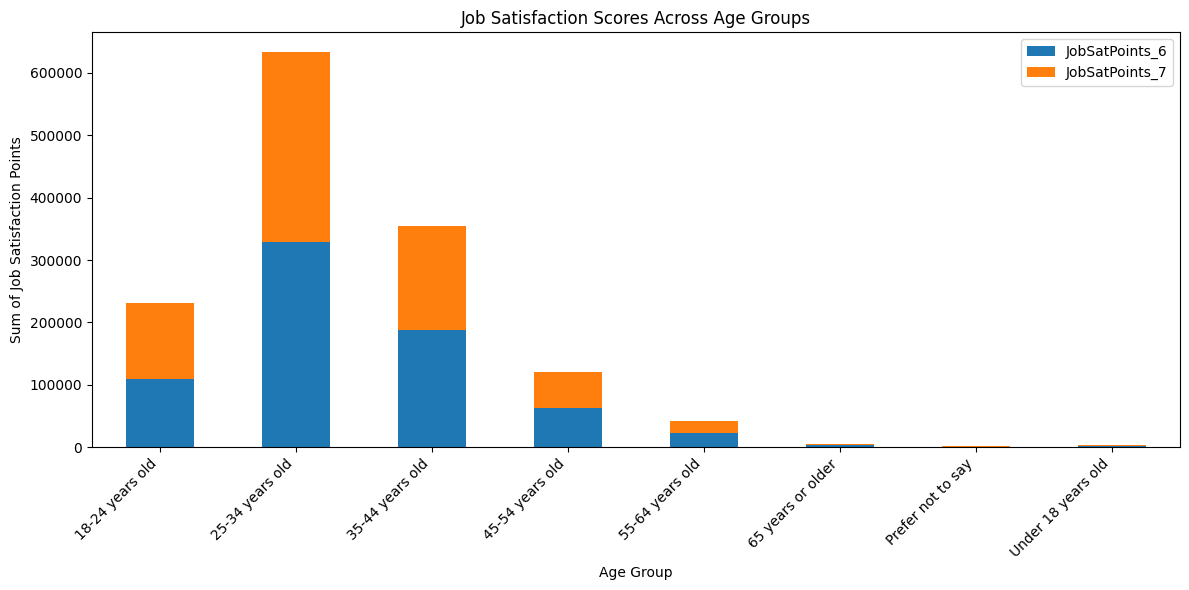

In [7]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data and prepare for stacked chart
df_filtered = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by age and calculate sums
age_job_sat = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

# Create stacked bar chart
age_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Satisfaction Scores Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Sum of Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


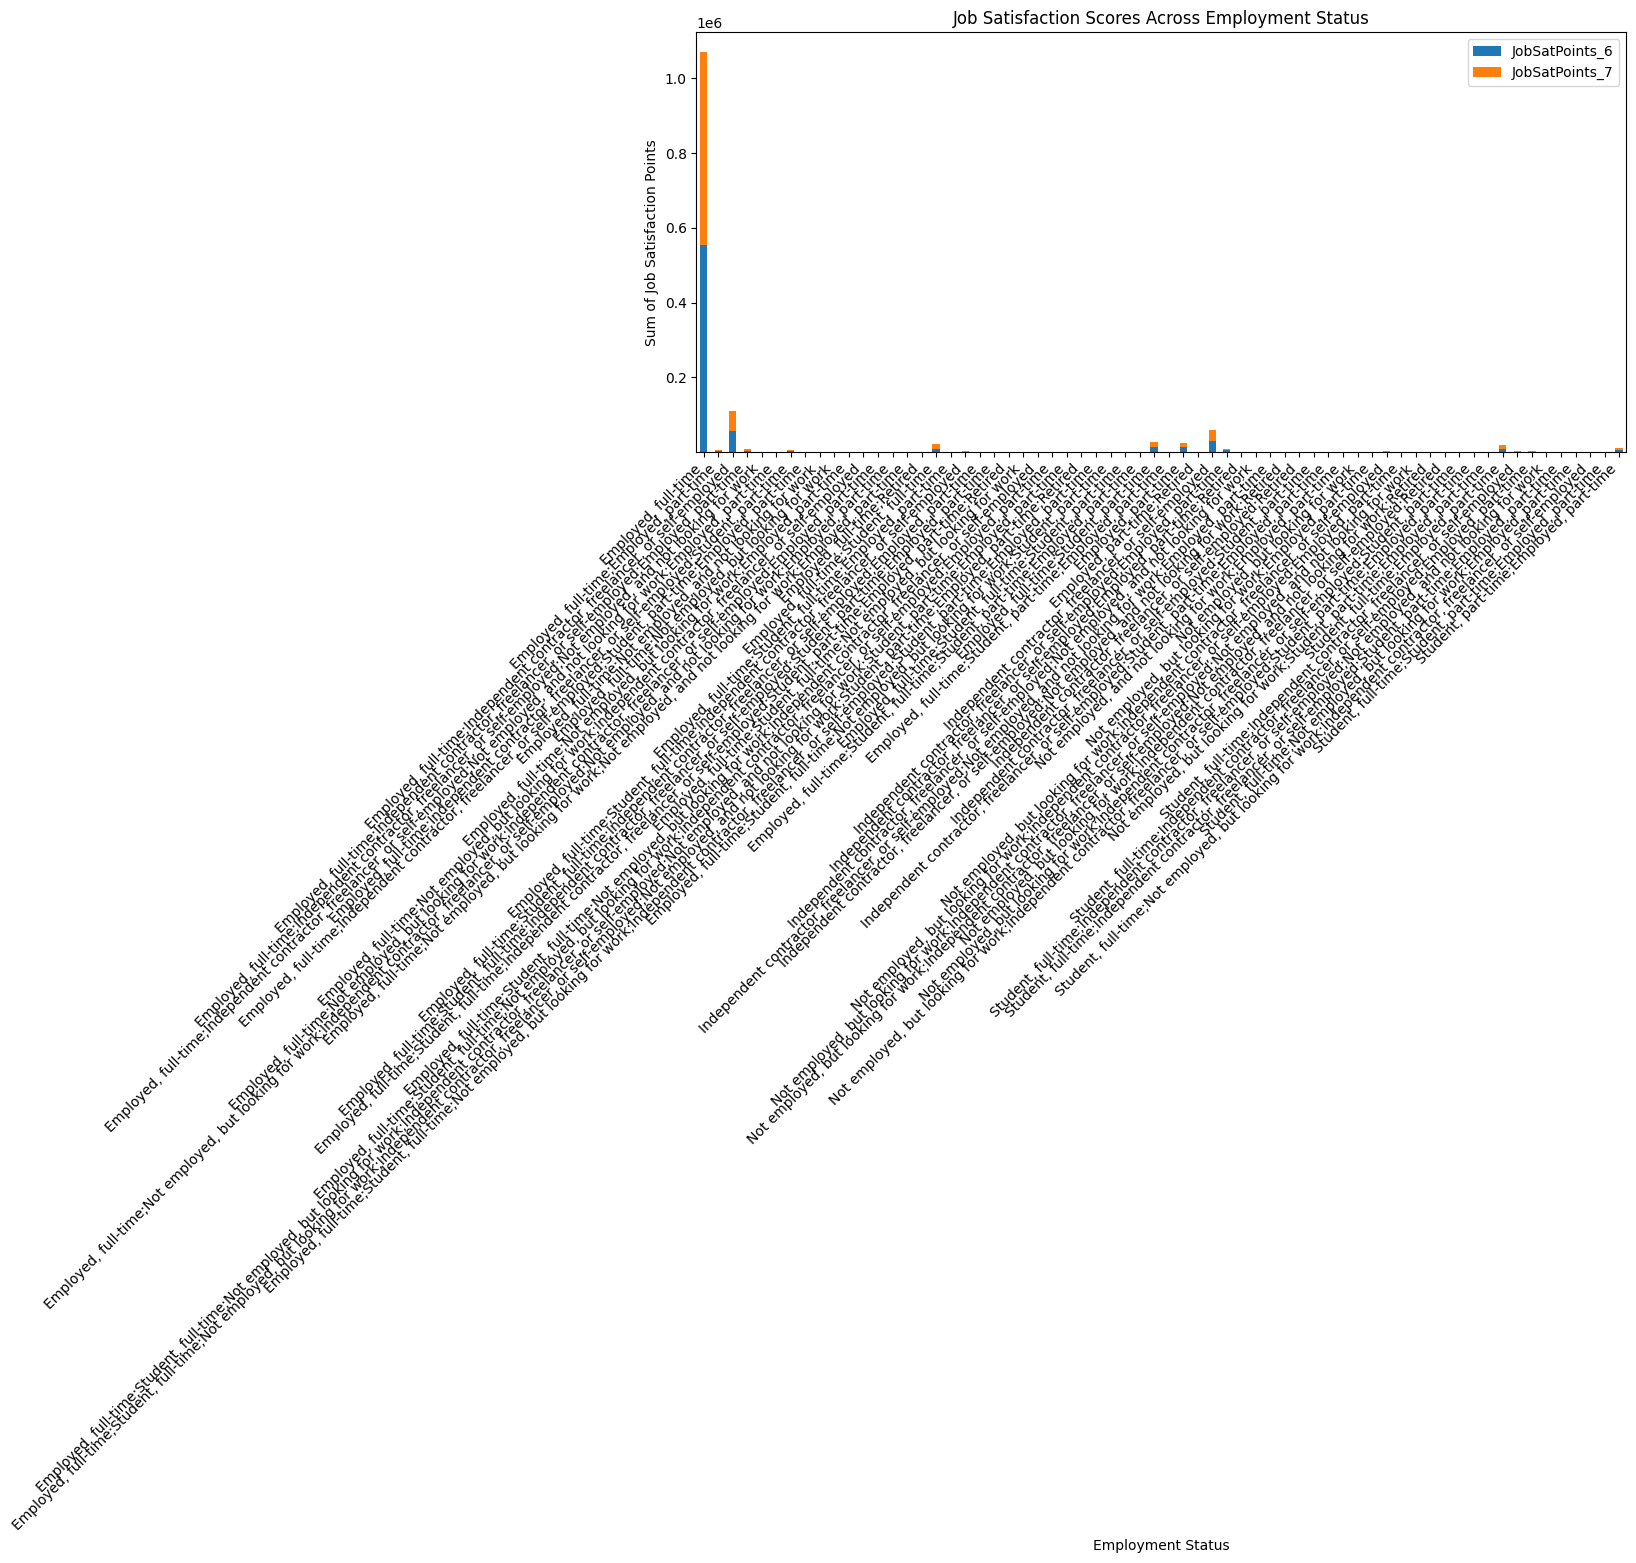

In [8]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

employment_job_sat = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

employment_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Satisfaction Scores Across Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Sum of Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2, top=0.9) #adjust margins
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


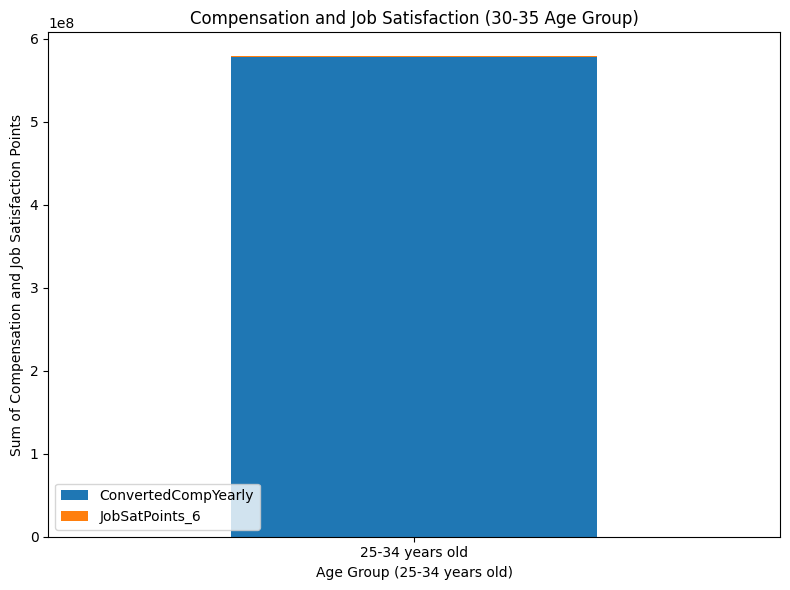

In [9]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data and filter for age group 30-35
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])
df_filtered = df_filtered[df_filtered['Age'] == '25-34 years old'] #Assuming 30-35 falls in this range.

# Group by age and calculate sums
age_comp_job_sat = df_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].sum()

# Create stacked bar chart
age_comp_job_sat.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Compensation and Job Satisfaction (30-35 Age Group)')
plt.xlabel('Age Group (25-34 years old)')
plt.ylabel('Sum of Compensation and Job Satisfaction Points')
plt.xticks(rotation=0) #only one bar, so no rotation needed.
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


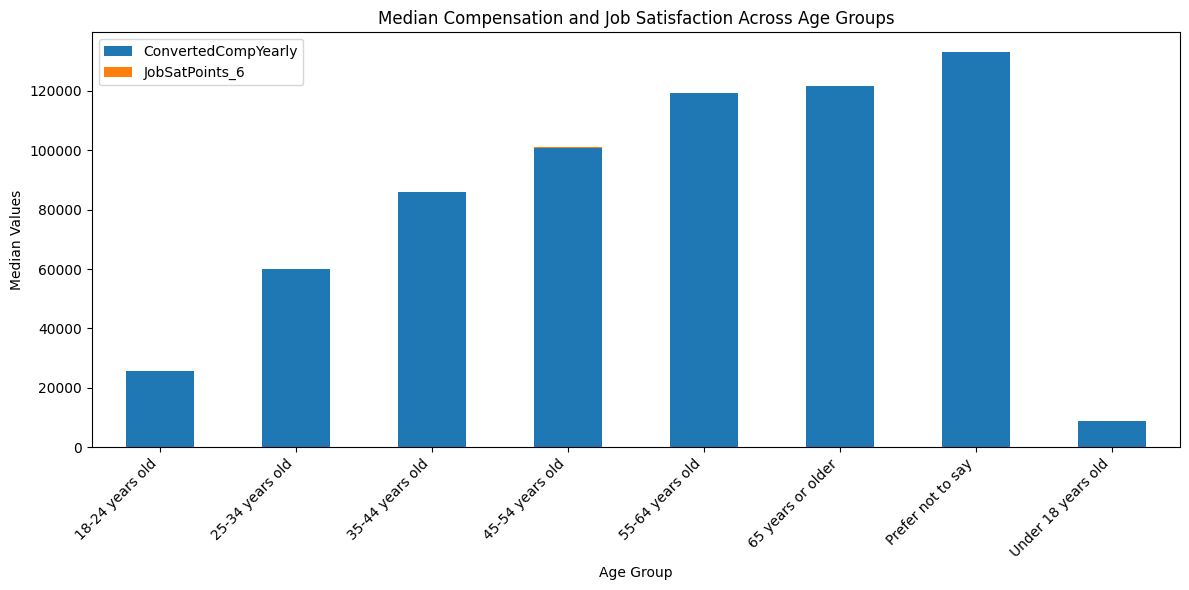

In [10]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Group by age and calculate medians
age_comp_job_sat = df_filtered.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
})

# Create stacked bar chart
age_comp_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


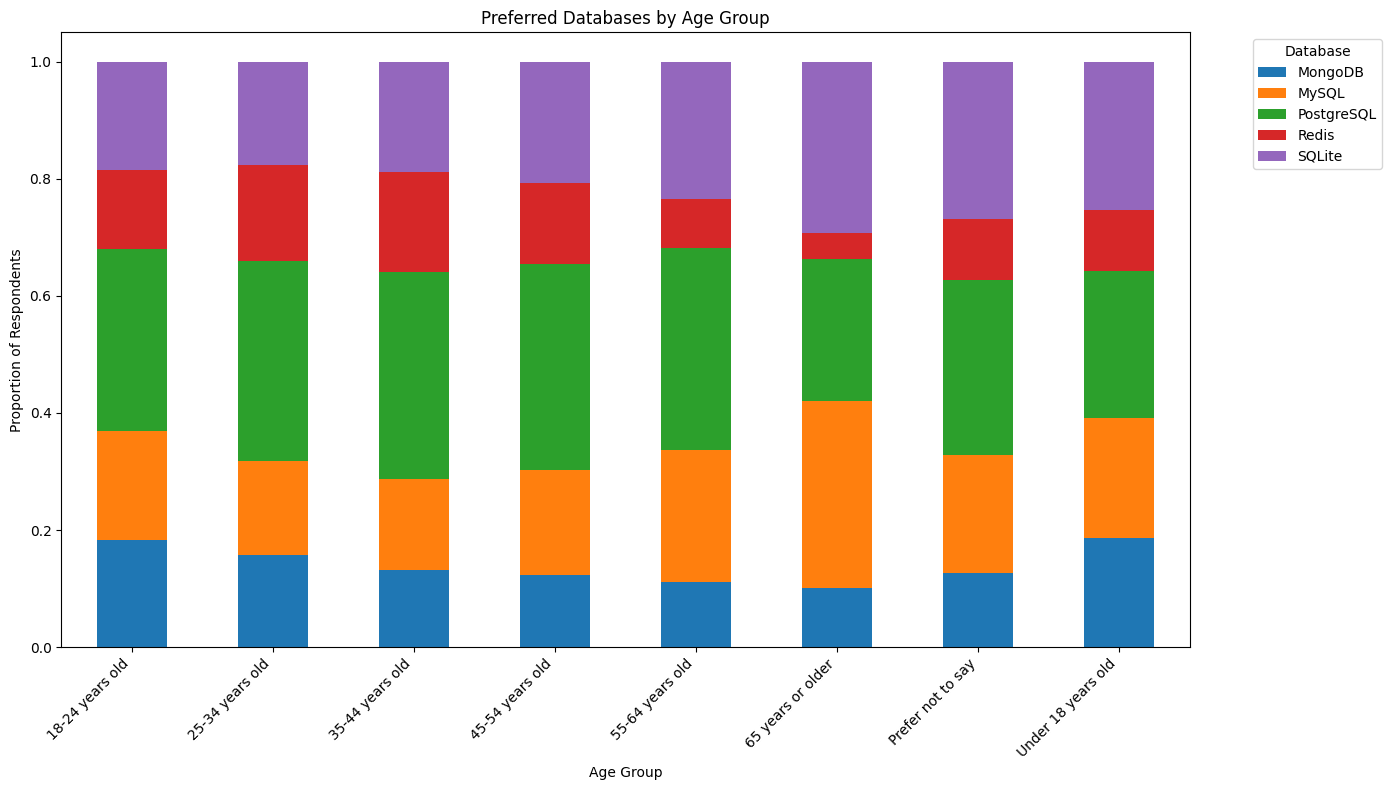

In [11]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'DatabaseWantToWorkWith']).copy() # explicitly create a copy

# Split databases using .loc
df_filtered.loc[:, 'DatabaseWantToWorkWith'] = df_filtered['DatabaseWantToWorkWith'].str.split(';')

# Explode the list of databases
df_exploded = df_filtered.explode('DatabaseWantToWorkWith')

# Get top databases
top_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5).index.tolist()

# Filter for top databases
df_top_databases = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_databases)]

# Group by age and database, then count
age_database_counts = df_top_databases.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Normalize to proportions
age_database_proportions = age_database_counts.div(age_database_counts.sum(axis=1), axis=0)

# Create stacked bar chart
age_database_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


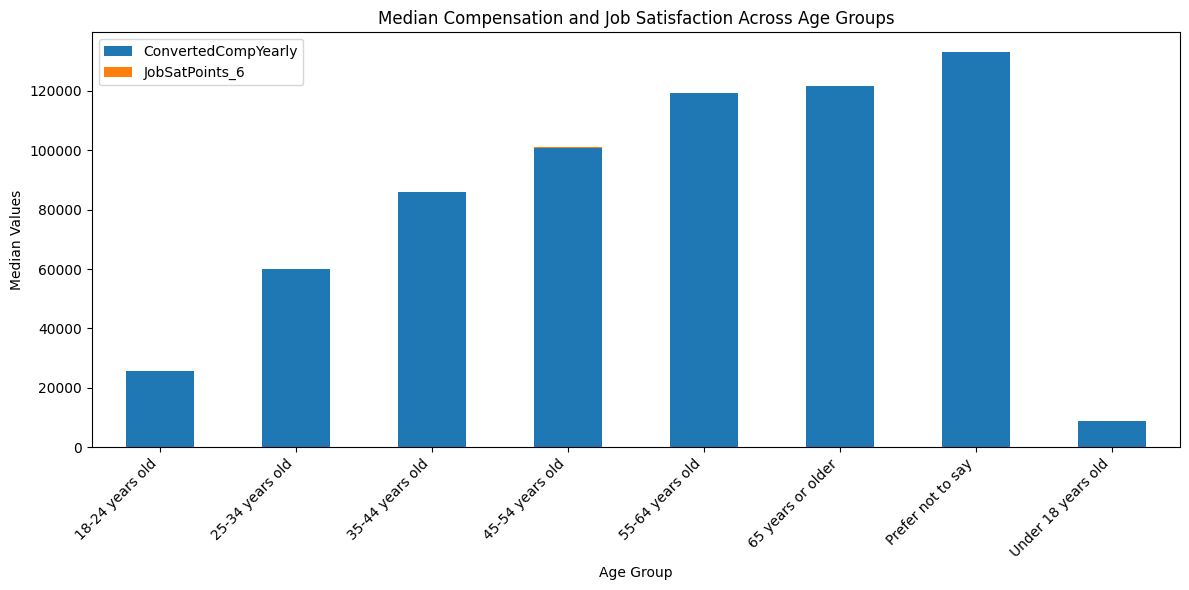

In [12]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Group by age and calculate medians
age_comp_job_sat = df_filtered.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
})

# Create stacked bar chart
age_comp_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


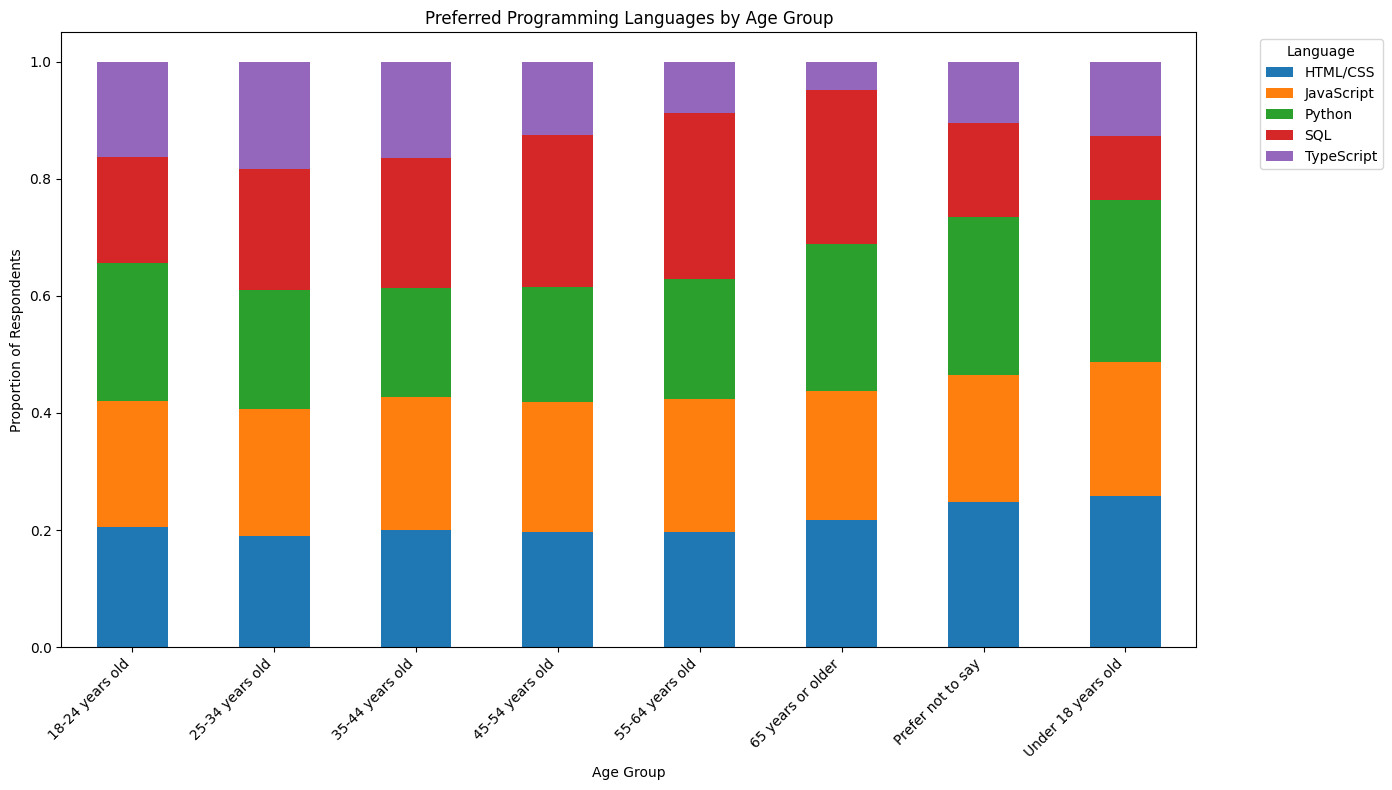

In [13]:
##Write your code here


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'LanguageAdmired']).copy()

# Split languages
df_filtered.loc[:, 'LanguageAdmired'] = df_filtered['LanguageAdmired'].str.split(';')

# Explode the list of languages
df_exploded = df_filtered.explode('LanguageAdmired')

# Get top languages
top_languages = df_exploded['LanguageAdmired'].value_counts().head(5).index.tolist()

# Filter for top languages
df_top_languages = df_exploded[df_exploded['LanguageAdmired'].isin(top_languages)]

# Group by age and language, then count
age_language_counts = df_top_languages.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Normalize to proportions
age_language_proportions = age_language_counts.div(age_language_counts.sum(axis=1), axis=0)

# Create stacked bar chart
age_language_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


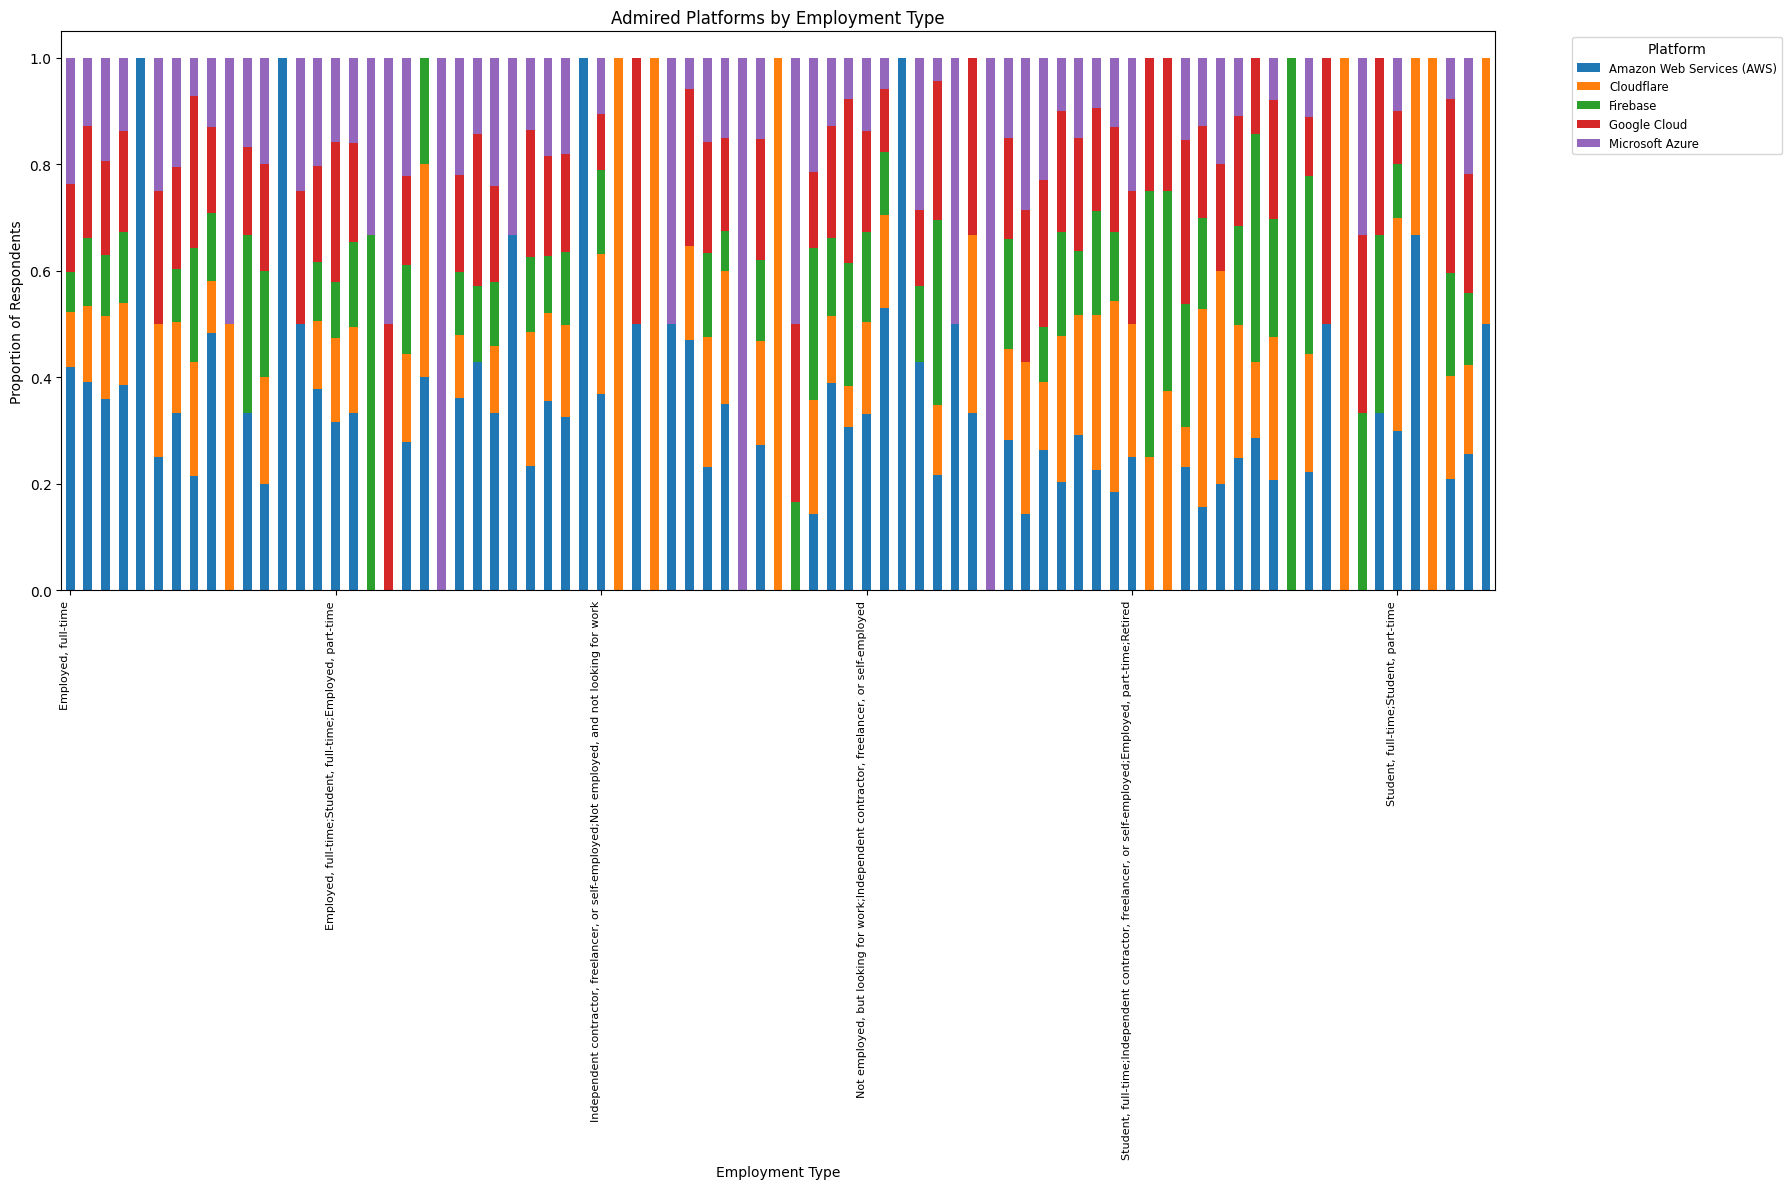

In [14]:
##Write your code here   

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Employment', 'PlatformAdmired']).copy()

# Split platforms
df_filtered.loc[:, 'PlatformAdmired'] = df_filtered['PlatformAdmired'].str.split(';')

# Explode the list of platforms
df_exploded = df_filtered.explode('PlatformAdmired')

# Get top platforms
top_platforms = df_exploded['PlatformAdmired'].value_counts().head(5).index.tolist()

# Filter for top platforms
df_top_platforms = df_exploded[df_exploded['PlatformAdmired'].isin(top_platforms)]

# Group by employment and platform, then count
employment_platform_counts = df_top_platforms.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Normalize to proportions
employment_platform_proportions = employment_platform_counts.div(employment_platform_counts.sum(axis=1), axis=0)

# Create stacked bar chart
# employment_platform_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
employment_platform_proportions.plot(kind='bar', stacked=True, figsize=(18, 12)) # Increased figure size


# plt.title('Admired Platforms by Employment Type')
# plt.xlabel('Employment Type')
# plt.ylabel('Proportion of Respondents')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Admired Platforms by Employment Type', fontsize=12) #reduce fontsize
plt.xlabel('Employment Type', fontsize=10) #reduce fontsize
plt.ylabel('Proportion of Respondents', fontsize=10) #reduce fontsize
plt.xticks(rotation=45, ha='right', fontsize=8) #reduce fontsize
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8) #reduce fontsize

plt.subplots_adjust(bottom=0.2, top=0.9) #adjust margins
plt.xticks(rotation=90, ha='right') # or rotation = 'vertical'
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8)) #Show a max of 8 ticks
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=1)

plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
